# 2. Accessing Text Corpora and Lexical Resources

## Goals

1. What are some useful text corpora and lexical resources, and how can we access them with Python?
2. Which Python constructs are most helpful for this work?
3. How do we avoid repeating ourselves when writing Python code?

### 1. Accessing text corpora

Aren't we lucky? NLTK provides a small sample of Project Gutenberg texts.

In [1]:
# Let's import like an expert
from nltk.corpus import gutenberg


In [25]:
# import nltk

In [3]:
# Get the file ids so we can reference a book in the corpus
# nltk.corpus.gutenberg.fileids()

gutenberg.fileids()

For my tastes, Persuasion is the best Austen novel, so we'll pick it instead of Emma, as in the NLTK book example.

In [4]:
# Count how many words in the fileid 'austen-persuasion.txt'
persuasion_words = gutenberg.words('austen-persuasion.txt')
len(persuasion_words)

98171

Next, we'll write a small program looping over each of the `gutenberg.fileids()`, and capturing the characters per word, the words per sentence, and then finally, the number of words per unique word. 

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 19 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


Observe that average word length appears to be a general property of English, since it has a recurrent value of 4. (In fact, the average word length is really 3 not 4, since the num_chars variable counts space characters.) By contrast average sentence length and lexical diversity appear to be characteristics of particular authors.

Notice that `gutenberg.raw()` gives you the number of characters, including spaces.

But let's take a look at `gutenberg.sents()`.

In [6]:
persuasion_sentences = gutenberg.sents('austen-persuasion.txt')
persuasion_sentences[10]

['"',
 'Heir',
 'presumptive',
 ',',
 'William',
 'Walter',
 'Elliot',
 ',',
 'Esq',
 '.,',
 'great',
 'grandson',
 'of',
 'the',
 'second',
 'Sir',
 'Walter',
 '."']

In [7]:
longest_len = max(len(s) for s in persuasion_sentences)

In [8]:
longest_sentence = [s for s in persuasion_sentences if len(s) == longest_len]

In [9]:
longest_sentence

[['For',
  ',',
  'though',
  'shy',
  ',',
  'he',
  'did',
  'not',
  'seem',
  'reserved',
  ';',
  'it',
  'had',
  'rather',
  'the',
  'appearance',
  'of',
  'feelings',
  'glad',
  'to',
  'burst',
  'their',
  'usual',
  'restraints',
  ';',
  'and',
  'having',
  'talked',
  'of',
  'poetry',
  ',',
  'the',
  'richness',
  'of',
  'the',
  'present',
  'age',
  ',',
  'and',
  'gone',
  'through',
  'a',
  'brief',
  'comparison',
  'of',
  'opinion',
  'as',
  'to',
  'the',
  'first',
  '-',
  'rate',
  'poets',
  ',',
  'trying',
  'to',
  'ascertain',
  'whether',
  'Marmion',
  'or',
  'The',
  'Lady',
  'of',
  'the',
  'Lake',
  'were',
  'to',
  'be',
  'preferred',
  ',',
  'and',
  'how',
  'ranked',
  'the',
  'Giaour',
  'and',
  'The',
  'Bride',
  'of',
  'Abydos',
  ';',
  'and',
  'moreover',
  ',',
  'how',
  'the',
  'Giaour',
  'was',
  'to',
  'be',
  'pronounced',
  ',',
  'he',
  'showed',
  'himself',
  'so',
  'intimately',
  'acquainted',
  'with',
 

## 1.2 Web and Chat Text

Text from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews:

In [10]:
from nltk.corpus import webtext

In [11]:
first_chat = [(fileid, webtext.raw(fileid)[:65], '...') for fileid in webtext.fileids()]

In [12]:
first_chat

[('firefox.txt',
  'Cookie Manager: "Don\'t allow sites that set removed cookies to se',
  '...'),
 ('grail.txt',
  'SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop',
  '...'),
 ('overheard.txt',
  'White guy: So, do you have any plans for this evening?\nAsian girl',
  '...'),
 ('pirates.txt',
  "PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr",
  '...'),
 ('singles.txt',
  '25 SEXY MALE, seeks attrac older single lady, for discreet encoun',
  '...'),
 ('wine.txt',
  'Lovely delicate, fragrant Rhone wine. Polished leather and strawb',
  '...')]

In [13]:
from nltk.corpus import nps_chat

In [14]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

In [15]:
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

## 1.3 Brown Corpus

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

We can access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). We can optionally specify particular categories or files to read:

In [16]:
from nltk.corpus import brown

In [17]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [18]:
brown.words(categories='science_fiction')

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

In [19]:
brown.words(fileids=['cg23'])

['During', 'the', 'last', 'years', 'of', 'Woodrow', ...]

In [20]:
brown.sents(categories=['lore','science_fiction'])

[['In', 'American', 'romance', ',', 'almost', 'nothing', 'rates', 'higher', 'than', 'what', 'the', 'movie', 'men', 'have', 'called', '``', 'meeting', 'cute', "''", '--', 'that', 'is', ',', 'boy-meets-girl', 'seems', 'more', 'adorable', 'if', 'it', "doesn't", 'take', 'place', 'in', 'an', 'atmosphere', 'of', 'correct', 'and', 'acute', 'boredom', '.'], ['Just', 'about', 'the', 'most', 'enthralling', 'real-life', 'example', 'of', 'meeting', 'cute', 'is', 'the', 'Charles', 'MacArthur-Helen', 'Hayes', 'saga', ':', 'reputedly', 'all', 'he', 'did', 'was', 'give', 'her', 'a', 'handful', 'of', 'peanuts', ',', 'but', 'he', 'said', 'simultaneously', ',', '``', 'I', 'wish', 'they', 'were', 'emeralds', "''", '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre. Remember to import nltk before doing the following:

In [21]:
sci_fi_text = brown.words(categories='science_fiction')

In [28]:
from nltk import FreqDist
fdist = nltk.FreqDist(w.lower() for w in sci_fi_text)

In [29]:
modal_words = ['can', 'could', 'may', 'might', 'must', 'will']

In [32]:
[print(m + ':', fdist[m], end=' ') for m in modal_words]

can: 16 could: 49 may: 4 might: 12 must: 8 will: 17 

[None, None, None, None, None, None]

In [34]:
lore_text = brown.words(categories='lore')
lore_fdist = FreqDist(w.lower() for w in lore_text)

In [36]:
[print(m + ':', lore_fdist[m], end=' ') for m in modal_words]

can: 170 could: 142 may: 170 might: 50 must: 96 will: 178 

[None, None, None, None, None, None]

Now let's compare the frequency of modals across multiple categories.

In [40]:
from nltk import ConditionalFreqDist
con_fdist = ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))

In [41]:
genres = ['hobbies', 'lore', 'science_fiction', 'fiction', 'editorial', 'government']

In [44]:
con_fdist.tabulate(conditions=genres, samples=modal_words)

                  can could   may might  must  will 
        hobbies   268    58   131    22    83   264 
           lore   170   141   165    49    96   175 
science_fiction    16    49     4    12     8    16 
        fiction    37   166     8    44    55    52 
      editorial   121    56    74    39    53   233 
     government   117    38   153    13   102   244 


As might be expected, the government category has the most `musts`, and lore has the most `mays`.

## 1.4 Reuters Corpus

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid 'test/14826' is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document, as we will see in chap-data-intensive.

In [45]:
from nltk.corpus import reuters

In [50]:
# reuters.fileids()
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Unlike the Brown Corpus, categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.


In [53]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [55]:
reuters.fileids(['tin', 'zinc', 'nickle', 'copper'])

['test/14832',
 'test/14844',
 'test/14852',
 'test/14877',
 'test/14882',
 'test/15112',
 'test/15219',
 'test/15264',
 'test/15624',
 'test/15817',
 'test/15831',
 'test/15932',
 'test/15988',
 'test/16110',
 'test/16123',
 'test/16194',
 'test/17480',
 'test/17486',
 'test/17509',
 'test/17714',
 'test/17731',
 'test/17783',
 'test/17805',
 'test/18225',
 'test/18280',
 'test/18317',
 'test/18337',
 'test/18339',
 'test/18849',
 'test/18924',
 'test/18943',
 'test/18945',
 'test/18952',
 'test/19065',
 'test/19367',
 'test/19431',
 'test/19477',
 'test/19692',
 'test/19764',
 'test/19781',
 'test/19786',
 'test/20096',
 'test/20458',
 'training/10332',
 'training/10485',
 'training/1077',
 'training/11190',
 'training/11224',
 'training/1148',
 'training/11801',
 'training/1184',
 'training/11945',
 'training/12024',
 'training/12215',
 'training/12223',
 'training/12484',
 'training/12489',
 'training/12857',
 'training/12861',
 'training/12910',
 'training/12980',
 'training/12992

In [56]:
reuters.fileids('copper')

['test/14852',
 'test/15264',
 'test/15831',
 'test/15932',
 'test/15988',
 'test/16110',
 'test/16123',
 'test/17509',
 'test/17714',
 'test/18225',
 'test/18280',
 'test/18317',
 'test/18339',
 'test/18849',
 'test/18952',
 'test/19781',
 'test/19786',
 'test/20096',
 'training/1148',
 'training/1184',
 'training/11945',
 'training/12024',
 'training/12215',
 'training/12223',
 'training/12484',
 'training/12489',
 'training/12857',
 'training/12861',
 'training/12910',
 'training/12980',
 'training/12992',
 'training/13003',
 'training/13694',
 'training/13877',
 'training/14297',
 'training/14476',
 'training/14499',
 'training/14572',
 'training/14805',
 'training/1607',
 'training/2006',
 'training/2074',
 'training/2186',
 'training/22',
 'training/2764',
 'training/2782',
 'training/2880',
 'training/3454',
 'training/3613',
 'training/3862',
 'training/4291',
 'training/4431',
 'training/5435',
 'training/5788',
 'training/5827',
 'training/5888',
 'training/6025',
 'training/

Similarly, we can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [62]:
reuters.words('training/816')[:14]

['U',
 '.',
 'S',
 '.',
 'BRASS',
 'MILL',
 'COPPER',
 'STOCKS',
 'LOWER',
 'IN',
 'JANUARY',
 'U',
 '.',
 'S']

In [63]:
reuters.words(['training/816', 'training/9195'])

['U', '.', 'S', '.', 'BRASS', 'MILL', 'COPPER', ...]

In [66]:
reuters.words(categories='tin')[:7]

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', 'QUARTER']

## 1.5 Inaugurla Address Corpus 

In 1, we looked at the Inaugural Address Corpus, but treated it as a single text. The graph in fig-inaugural used "word offset" as one of the axes; this is the numerical index of the word in the corpus, counting from the first word of the first address. However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

In [67]:
from nltk.corpus import inaugural

In [68]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [69]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

The following code converts the words in the Inaugural corpus to lowercase using w.lower() [1], then checks if they start with either of the "targets" america or citizen using startswith() [1]. Thus it will count words like American's and Citizens.

In [72]:
con_fdist_inaug = ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['freedom', 'responsibility']
    if w.lower().startswith(target))

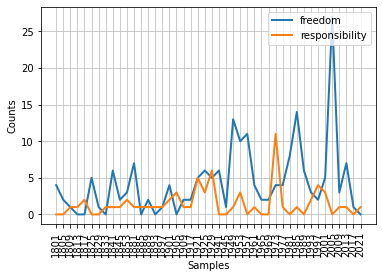

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
con_fdist_inaug.plot()

## 1.8   Text Corpus Structure

We have seen a variety of corpus structures so far; these are summarized in 1.3. The simplest kind lacks any structure: it is just a collection of texts. Often, texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories as a text can be relevant to more than one topic. Occasionally, text collections have temporal structure, news collections being the most common example.

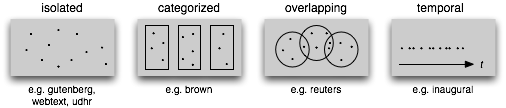

_Common Structures for Text Corpora: The simplest kind of corpus is a collection of isolated texts with no particular organization; some corpora are structured into categories like genre (Brown Corpus); some categorizations overlap, such as topic categories (Reuters Corpus); other corpora represent language use over time (Inaugural Address Corpus)._

Example	Description
fileids()	the files of the corpus
fileids([categories])	the files of the corpus corresponding to these categories
categories()	the categories of the corpus
categories([fileids])	the categories of the corpus corresponding to these files
raw()	the raw content of the corpus
raw(fileids=[f1,f2,f3])	the raw content of the specified files
raw(categories=[c1,c2])	the raw content of the specified categories
words()	the words of the whole corpus
words(fileids=[f1,f2,f3])	the words of the specified fileids
words(categories=[c1,c2])	the words of the specified categories
sents()	the sentences of the whole corpus
sents(fileids=[f1,f2,f3])	the sentences of the specified fileids
sents(categories=[c1,c2])	the sentences of the specified categories
abspath(fileid)	the location of the given file on disk
encoding(fileid)	the encoding of the file (if known)
open(fileid)	open a stream for reading the given corpus file
root	if the path to the root of locally installed corpus
readme()	the contents of the README file of the corpus

## 1.9   Loading your own Corpus
If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's PlaintextCorpusReader. Check the location of your files on your file system; in the following example, we have taken this to be the directory /usr/share/dict. Whatever the location, set this to be the value of corpus_root [1]. The second parameter of the PlaintextCorpusReader initializer [2] can be a list of fileids, like ['a.txt', 'test/b.txt'], or a pattern that matches all fileids, like '[abc]/.*\.txt' (see 3.4 for information about regular expressions).

## 2   Conditional Frequency Distributions
We saw that given some list mylist of words or other items, FreqDist(mylist) would compute the number of occurrences of each item in the list. Here we will generalize this idea.

When the texts of a corpus are divided into several categories, by genre, topic, author, etc, we can maintain separate frequency distributions for each category. This will allow us to study systematic differences between the categories. In the previous section we achieved this using NLTK's ConditionalFreqDist data type. A conditional frequency distribution is a collection of frequency distributions, each one for a different "condition". The condition will often be the category of the text. 2.1 depicts a fragment of a conditional frequency distribution having just two conditions, one for news text and one for romance text

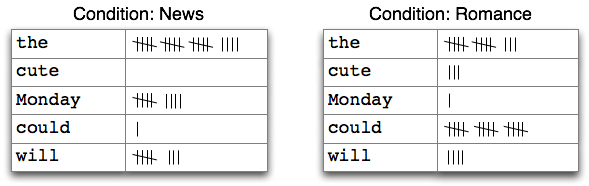

## 2.1   Conditions and Events
A frequency distribution counts observable events, such as the appearance of words in a text. A conditional frequency distribution needs to pair each event with a condition. So instead of processing a sequence of words [1], we have to process a sequence of pairs:

## 2.2   Counting Words by Genre
In 1 we saw a conditional frequency distribution where the condition was the section of the Brown Corpus, and for each condition we counted words. Whereas FreqDist() takes a simple list as input, ConditionalFreqDist() takes a list of pairs.

In [82]:
brown_con_fdisk = ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word  in brown.words(categories=genre))

Let's break this down, and look at just two genres, news and romance. For each genre [2], we loop over every word in the genre [3], producing pairs consisting of the genre and the word [1]:



In [85]:
genre_word = [(genre, word)
              for genre in ['fiction', 'science_fiction']
              for word in brown.words(categories=genre)]

So, as we can see below, pairs at the beginning of the list genre_word will be of the form ('fiction', word) [1], while those at the end will be of the form ('science_fiction', word).



In [86]:
genre_word[:4]

[('fiction', 'Thirty-three'),
 ('fiction', 'Scotty'),
 ('fiction', 'did'),
 ('fiction', 'not')]

In [87]:
genre_word[-4:]

[('science_fiction', 'out'),
 ('science_fiction', 'of'),
 ('science_fiction', 'pain'),
 ('science_fiction', '.')]